# 🧪 Lab: Prompt Engineering กับ MLflow
## เรียนรู้ 3 เทคนิค + Reflection Loop + การติดตามผลด้วย MLflow

---

## 🎯 เป้าหมายของ Lab นี้

ในการพัฒนา AI Application จริง เราต้องการ:
1. **เทคนิคการเขียน Prompt ที่ดี** → ให้ AI ตอบถูกต้องและมีคุณภาพ
2. **ระบบติดตามผล** → รู้ว่า Prompt เวอร์ชันไหนดีที่สุด
3. **การปรับปรุงอัตโนมัติ** → ให้ AI ช่วยปรับ Prompt เอง

Lab นี้จะสอน 3 เทคนิคหลัก + วิธีใช้ MLflow ติดตามทุกอย่าง

---

# 🧪 Big Picture: Prompt Engineering + MLflow

---

## 🗺️ ภาพรวมทั้ง 3 เทคนิค

```
╔══════════════════════════════════════════════════════════════════════════╗
║                                                                        ║
║   📝 Problem / Task                                                    ║
║   ─────────────────                                                    ║
║        │                                                               ║
║        ├──────────────────┬──────────────────┐                         ║
║        ▼                  ▼                  ▼                         ║
║   ┌─────────┐       ┌─────────┐       ┌─────────┐                     ║
║   │ 🎯 T1   │       │ 🔗 T2   │       │ ⚔️ T3   │                     ║
║   │  Self-   │       │ Prompt  │       │  Self-  │                     ║
║   │Consiste- │       │Chaining │       │Critique │                     ║
║   │  ncy     │       │         │       │         │                     ║
║   └────┬─────┘       └────┬────┘       └────┬────┘                     ║
║        │                  │                  │                         ║
║        ▼                  ▼                  ▼                         ║
║   ┌─────────┐       ┌─────────┐       ┌─────────┐                     ║
║   │ Answer  │       │ Answer  │       │ Answer  │                     ║
║   └────┬────┘       └────┬────┘       └────┬────┘                     ║
║        │                  │                  │                         ║
║        └──────────────────┼──────────────────┘                         ║
║                           ▼                                            ║
║                  ┌─────────────────┐                                   ║
║                  │  🔁 Reflection  │                                   ║
║                  │     Loop        │                                   ║
║                  └────────┬────────┘                                   ║
║                           ▼                                            ║
║                  ┌─────────────────┐                                   ║
║                  │  📊 MLflow      │                                   ║
║                  │  Track & Compare│                                   ║
║                  └─────────────────┘                                   ║
║                                                                        ║
╚══════════════════════════════════════════════════════════════════════════╝
```

---

## 🎯 Technique 1 — Self-Consistency

> ถามคำถามเดิมซ้ำ N ครั้ง → รวบรวมคำตอบ → โหวตเสียงข้างมาก

```
                        ╭───────────╮
                        │  🧮 โจทย์  │
                        ╰─────┬─────╯
                              │
              ┌───────────────┼───────────────┐
              ▼               ▼               ▼
        ╭───────────╮  ╭───────────╮  ╭───────────╮
        │  🧠 Path 1 │  │  🧠 Path 2 │  │  🧠 Path 3 │
        │  temp=0.7  │  │  temp=0.7  │  │  temp=0.7  │
        ╰─────┬─────╯  ╰─────┬─────╯  ╰─────┬─────╯
              │               │               │
              ▼               ▼               ▼
          ╭──────╮       ╭──────╮       ╭──────╮
          │  42  │       │  42  │       │  38  │
          ╰──┬───╯       ╰──┬───╯       ╰──┬───╯
              │               │               │
              └───────────────┼───────────────┘
                              ▼
                     ╭────────────────╮
                     │  🗳️ Majority   │
                     │     Vote       │
                     ╰───────┬────────╯
                              ▼
                     ╭────────────────╮
                     │  ✅ Answer: 42 │
                     │  Confidence 67%│
                     ╰────────────────╯
```

**เมื่อไหร่ควรใช้:** คณิตศาสตร์ · Logic · คำถามที่มีคำตอบเดียว

---

## 🔗 Technique 2 — Prompt Chaining

> แบ่งงานเป็นขั้นตอนย่อย → ส่ง output ต่อกันเป็นทอด ๆ

```
   ╭──────────╮
   │  💬 Review │
   ╰─────┬────╯
         │
         ▼
   ╔═══════════════════════════════╗
   ║  Step 1: 🔍 Extract          ║
   ║  สกัดข้อมูลจาก Review        ║
   ║  → positive, negative, tone  ║
   ╚═════════════╤═════════════════╝
                 │  JSON output
                 ▼
   ╔═══════════════════════════════╗
   ║  Step 2: 📊 Analyze          ║
   ║  วิเคราะห์ Sentiment & Risk  ║
   ║  → score, urgent fixes       ║
   ╚═════════════╤═════════════════╝
                 │  JSON output
                 ▼
   ╔═══════════════════════════════╗
   ║  Step 3: 📋 Report           ║
   ║  สรุป Executive Summary      ║
   ║  → headline, actions, risk   ║
   ╚═══════════════════════════════╝
                 │
                 ▼
          ╭──────────────╮
          │ 📄 รายงานสรุป │
          ╰──────────────╯
```

**เมื่อไหร่ควรใช้:** งานซับซ้อนหลายขั้น · Document Processing · ต้องการ Debug แยกขั้น

---

## ⚔️ Technique 3 — Self-Critique

> ให้ AI ตรวจงานตัวเอง → ชี้จุดอ่อน → แก้ไข → วนซ้ำ

```
   ╭──────────╮
   │  ❓ คำถาม │
   ╰─────┬────╯
         │
         ▼
   ╔════════════════╗
   ║  📝 Generate   ║──────────╮
   ║  สร้างคำตอบ    ║          │
   ╚═══════╤════════╝          │
           │                   │
           ▼                   │ วนซ้ำได้
   ╔════════════════╗          │ N รอบ
   ║  ⚔️ Critique    ║          │
   ║  วิพากษ์จุดอ่อน ║          │
   ║  ─────────────  ║          │
   ║  □ Logic Error? ║          │
   ║  □ Missing View?║          │
   ║  □ Bias?        ║          │
   ╚═══════╤════════╝          │
           │                   │
           ▼                   │
   ╔════════════════╗          │
   ║  ✏️ Revise      ║──────────╯
   ║  แก้ไขตามคำวิจ. ║
   ╚═══════╤════════╝
           │
           ▼
   ╭────────────────╮
   │ ✅ คำตอบสุดท้าย │
   │ (รอบด้านขึ้น)   │
   ╰────────────────╯
```

**เมื่อไหร่ควรใช้:** หัวข้อ Controversial · ต้องการ Unbiased · ต้องการความถูกต้องสูง

---

## 🔁 Reflection Loop — ปรับปรุง Prompt อัตโนมัติ

> ทดสอบ Prompt → วิเคราะห์ข้อผิด → สร้าง Prompt ใหม่ → วนจนถึงเป้า

```
   ╭─────────────────╮
   │ 📝 Prompt v1     │
   ╰────────┬────────╯
            │
            ▼
   ╔════════════════════╗         ╭──────────────────╮
   ║  🧪 Evaluate       ║────YES──▶│ 🎉 ถึงเป้าหมาย!  │
   ║  ทดสอบกับ Dataset  ║         │    accuracy ≥ 83% │
   ║  accuracy ≥ 83%?  ║         ╰──────────────────╯
   ╚═════════╤══════════╝
             │ NO
             ▼
   ╔════════════════════╗
   ║  🔍 Reflect        ║
   ║  วิเคราะห์ข้อที่ผิด ║
   ║  หา pattern ข้อผิด ║
   ╚═════════╤══════════╝
             │
             ▼
   ╔════════════════════╗
   ║  🆕 Improve        ║
   ║  สร้าง Prompt v2   ║
   ║  ลงทะเบียน MLflow  ║
   ╚═════════╤══════════╝
             │
             ╰──────────────────╮
                                │ loop กลับไป Evaluate
   ╭─────────────────╮         │
   │ 📝 Prompt v2     │◀────────╯
   ╰─────────────────╯
```

---

## 📊 MLflow — ศูนย์กลางการติดตามทุกอย่าง

```
   ╔══════════════════════════════════════════════════════════╗
   ║                    📊 MLflow Server                      ║
   ╠══════════════════════════════════════════════════════════╣
   ║                                                          ║
   ║  ┌──────────────────┐    ┌──────────────────────────┐   ║
   ║  │ 📦 Prompt Registry│    │ 📈 Experiment Tracking    │   ║
   ║  │                  │    │                          │   ║
   ║  │ sc_math_solver   │    │  Metrics:                │   ║
   ║  │   v1 → v2 → v3  │    │    accuracy: 83.3%       │   ║
   ║  │                  │    │    iterations: 2         │   ║
   ║  │ chain_extract v1 │    │                          │   ║
   ║  │ chain_analyze v1 │    │  Parameters:             │   ║
   ║  │ chain_report  v1 │    │    model: gemini-2.0     │   ║
   ║  │                  │    │    sc_samples: 3         │   ║
   ║  │ crit_generate v1 │    │    target_acc: 83%       │   ║
   ║  │ crit_critic   v1 │    │                          │   ║
   ║  │ crit_revise   v1 │    │                          │   ║
   ║  └──────────────────┘    └──────────────────────────┘   ║
   ║                                                          ║
   ╚══════════════════════════════════════════════════════════╝
```

---

## 🧭 แนวคิดหลัก

```
   วัดผล  ──▶  วิเคราะห์  ──▶  ปรับปรุง  ──▶  วัดผลซ้ำ
     │            │               │               │
     ▼            ▼               ▼               ▼
   MLflow     Reflection      New Prompt       MLflow
   Evaluate     Loop          Register        Compare
```

> **"Prompt Engineering ไม่ใช่ศิลปะ แต่เป็นวิทยาศาสตร์"**
> วัด → วิเคราะห์ → ปรับ → วนซ้ำ เหมือน Software Development ที่ดี

---
## ⚙️ ส่วนที่ 0: ติดตั้งและตั้งค่า

เริ่มต้นด้วยการ import library ที่จำเป็น และตั้งค่าการเชื่อมต่อ

In [1]:
# ติดตั้ง Library ที่จำเป็น
!pip install mlflow google-genai -q


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [25]:
# ─────────────────────────────────────────────────────────
#  Import Libraries
# ─────────────────────────────────────────────────────────

import mlflow
import mlflow.genai
import json
import time
import re

from collections import Counter
from typing import List, Dict, Any

from google import genai
from google.genai import types

# ─────────────────────────────────────────────────────────
#  การตั้งค่าหลัก (แก้ไขตรงนี้)
# ─────────────────────────────────────────────────────────

API_KEY   = "key"   # <<<< ใส่ Gemini API Key ของคุณ
MODEL_ID  = "gemini-2.0-flash"      # โมเดลที่ใช้
MLFLOW_URI = "http://127.0.0.1:5000" # ที่อยู่ MLflow Server

# ─────────────────────────────────────────────────────────
#  สร้าง Client และเชื่อมต่อ MLflow
# ─────────────────────────────────────────────────────────

client = genai.Client(api_key=API_KEY)

print("=" * 50)
print(f"  ✅ Gemini Model : {MODEL_ID}")

  ✅ Gemini Model : gemini-2.0-flash


In [3]:
mlflow.set_tracking_uri(MLFLOW_URI)
mlflow.set_experiment("prompt_engineering_lab")  # ชื่อ Experiment ใน MLflow

print(f"  ✅ MLflow URI   : {mlflow.get_tracking_uri()}")
print("=" * 50)

  ✅ MLflow URI   : http://127.0.0.1:5000


### 💡 ทำไมต้องใช้ Version Tracker?

MLflow เก็บ Prompt เป็น Version (1, 2, 3, ...) แต่**ไม่รองรับ "latest"** โดยตรง
เราจึงสร้าง dictionary ไว้ติดตาม version ล่าสุดของแต่ละ prompt เอง

```
_prompt_versions = {
    "sc_math_solver": 3,    ← ตอนนี้อยู่ที่ version 3
    "chain_extract":  1,    ← ยังอยู่ version 1
    ...
}
```

In [4]:
# ─────────────────────────────────────────────────────────
#  Version Tracker: ติดตาม Version ล่าสุดของแต่ละ Prompt
# ─────────────────────────────────────────────────────────

_prompt_versions: Dict[str, int] = {}


def track_version(name: str, version: int):
    """
    บันทึก version ล่าสุดของ prompt ลงใน dictionary
    ถ้า version ใหม่สูงกว่า version เดิม ให้อัปเดต
    """
    current_max = _prompt_versions.get(name, 0)
    _prompt_versions[name] = max(current_max, version)


def get_latest_version(name: str) -> int:
    """
    ดึง version ล่าสุดของ prompt
    ถ้ายังไม่เคย track ไว้ คืนค่า 1 เป็น default
    """
    return _prompt_versions.get(name, 1)


def load_latest_prompt(name: str):
    """
    โหลด prompt version ล่าสุดจาก MLflow Registry
    ใช้ format: prompts:/<ชื่อ>/<version>
    """
    latest_version = get_latest_version(name)
    prompt_uri = f"prompts:/{name}/{latest_version}"
    return mlflow.genai.load_prompt(prompt_uri)


# ─────────────────────────────────────────────────────────
#  ทดสอบว่า Version Tracker ทำงานได้
# ─────────────────────────────────────────────────────────

track_version("test_prompt", 1)
track_version("test_prompt", 3)
track_version("test_prompt", 2)  # ไม่ควรทับ version 3

assert get_latest_version("test_prompt") == 3, "Version Tracker มีปัญหา!"
print("  ✅ Version Tracker ทำงานถูกต้อง")
print(f"     track 1, 3, 2 → latest = {get_latest_version('test_prompt')}")

  ✅ Version Tracker ทำงานถูกต้อง
     track 1, 3, 2 → latest = 3


---
## 🎨 ส่วนที่ 1: Helper Functions สำหรับแสดงผล

เราจะสร้างฟังก์ชันช่วยแสดงผลสวยงาม ใน Jupyter Notebook
เพื่อให้อ่านและเข้าใจผลลัพธ์ได้ง่ายขึ้น

In [5]:
# ─────────────────────────────────────────────────────────
#  ฟังก์ชันหลัก: เรียก Gemini API
# ─────────────────────────────────────────────────────────

def call_gemini(prompt: str,
                temperature: float = 0.0,
                max_tokens: int = 2048) -> str:
    """
    ส่ง prompt ไปให้ Gemini และรับ text กลับมา

    Parameters:
        prompt      : ข้อความที่จะส่งให้ AI
        temperature : ความสร้างสรรค์ (0.0 = แม่นยำ, 1.0 = สร้างสรรค์)
        max_tokens  : จำนวน token สูงสุดของคำตอบ

    Returns:
        str : คำตอบจาก Gemini เป็น text
    """
    response = client.models.generate_content(
        model=MODEL_ID,
        contents=prompt,
        config=types.GenerateContentConfig(
            temperature=temperature,
            max_output_tokens=max_tokens,
        ),
    )
    return response.text


# ─────────────────────────────────────────────────────────
#  ฟังก์ชันแสดงผล: หัวข้อ (Title)
# ─────────────────────────────────────────────────────────

def print_title(text: str, level: int = 1):
    """
    แสดงหัวข้อแบ่งระดับ

    level 1 → หัวข้อใหญ่ (มีกรอบ ━━━)
    level 2 → หัวข้อรอง (เส้น ──)
    level 3 → หัวข้อย่อย (จุด ▸)
    """
    if level == 1:
        border = "━" * 62
        print(f"\n{border}")
        print(f"  🔷 {text}")
        print(f"{border}")

    elif level == 2:
        padding = "─" * max(1, 500 - len(text))
        print(f"\n  ── {text} {padding}")

    else:  # level 3
        print(f"\n    ▸ {text}")


# ─────────────────────────────────────────────────────────
#  ฟังก์ชันแสดงผล: กล่องข้อความ (Box)
# ─────────────────────────────────────────────────────────

def print_box(title: str, content: str,
              emoji: str = "📌", width: int = 78):
    """
    แสดงข้อความในกล่องสวยงาม พร้อม Word-wrap อัตโนมัติ

    Parameters:
        title   : ชื่อกล่อง
        content : เนื้อหาภายในกล่อง
        emoji   : ไอคอนหัวกล่อง
        width   : ความกว้างกล่อง (characters)
    """
    inner_width = width - 4  # พื้นที่ข้อความ (ลบกรอบ 4 ด้าน)

    # วาดกรอบบน
    print(f"\n  ┌{'─' * (width - 2)}┐")
    print(f"  │ {emoji} {title:<{inner_width - 2}}│")
    print(f"  ├{'─' * (width - 2)}┤")
    print(f"  │{' ' * (width - 2)}│")

    # แสดงเนื้อหาทีละบรรทัด พร้อม Word-wrap
    for line in content.split("\n"):
        line = line.rstrip()

        if not line:
            # บรรทัดว่าง
            print(f"  │{' ' * (width - 2)}│")
            continue

        # ตัดบรรทัดยาวให้พอดีกล่อง
        while len(line) > inner_width:
            cut_point = line[:inner_width].rfind(" ")
            if cut_point <= 0:
                cut_point = inner_width  # ตัดกลางคำถ้าจำเป็น
            print(f"  │ {line[:cut_point]:<{inner_width}} │")
            line = line[cut_point:].lstrip()

        print(f"  │ {line:<{inner_width}} │")

    # วาดกรอบล่าง
    print(f"  │{' ' * (width - 2)}│")
    print(f"  └{'─' * (width - 2)}┘")


# ─────────────────────────────────────────────────────────
#  ฟังก์ชันแสดงผล: ตาราง (Table)
# ─────────────────────────────────────────────────────────

def print_table(headers: List[str],
                rows: List[List[str]],
                title: str = ""):
    """
    แสดงตารางสวยงาม พร้อมปรับความกว้างแต่ละคอลัมน์อัตโนมัติ

    Parameters:
        headers : ชื่อคอลัมน์ ['Col A', 'Col B', ...]
        rows    : ข้อมูลแต่ละแถว [['a1', 'b1'], ['a2', 'b2'], ...]
        title   : หัวตาราง (optional)
    """
    if title:
        print(f"\n  📊 {title}")

    # คำนวณความกว้างแต่ละคอลัมน์ = max(ความยาว header, ความยาว data)
    col_widths = [
        max(
            len(str(header)),
            max((len(str(row[i])) for row in rows), default=0)
        ) + 2
        for i, header in enumerate(headers)
    ]

    # สร้าง separator แต่ละคอลัมน์
    def make_separator(left, mid, right):
        return f"  {left}" + f"{mid}".join("─" * (w + 1) for w in col_widths) + f"─{right}"

    # วาดหัวตาราง
    print(make_separator("┌", "─┬", "─┐"))

    header_line = "  │".join(f" {h:^{w}}" for h, w in zip(headers, col_widths))
    print(f"  │{header_line} │")

    print(make_separator("├", "─┼", "─┤"))

    # วาดข้อมูลแต่ละแถว
    for row in rows:
        row_line = "  │".join(f" {str(v):^{w}}" for v, w in zip(row, col_widths))
        print(f"  │{row_line} │")

    print(make_separator("└", "─┴", "─┘"))


# ─────────────────────────────────────────────────────────
#  ฟังก์ชันแสดงผล: Progress Bar และ Metric
# ─────────────────────────────────────────────────────────

def print_progress(current: int, total: int,
                   label: str = "", bar_width: int = 30):
    """
    แสดง Progress Bar แบบ text
    ตัวอย่าง: [████████░░░░░░░░░░░░░░░░░░░░░░] 27% Iter 1

    """
    pct = current / total if total > 0 else 0
    filled = int(bar_width * pct)
    bar = "█" * filled + "░" * (bar_width - filled)
    print(f"  [{bar}] {pct:.0%}  {label}")


def print_metric(label: str, value, unit: str = "", emoji: str = "📈"):
    """
    แสดง Metric สั้นๆ
    ตัวอย่าง: 📈 Accuracy: 83.3%
    """
    if isinstance(value, float):
        print(f"    {emoji} {label}: {value:.1f}{unit}")
    else:
        print(f"    {emoji} {label}: {value}{unit}")


def print_divider(char: str = "─", width: int = 60):
    """แสดงเส้นคั่น"""
    print(f"  {char * width}")


# ─────────────────────────────────────────────────────────
#  ทดสอบ Helper Functions
# ─────────────────────────────────────────────────────────

print_title("ทดสอบ Helper Functions", 1)
print_title("ระดับ 2: หัวข้อรอง", 2)
print_title("ระดับ 3: หัวข้อย่อย", 3)

print_box(
    title   = "ตัวอย่าง Box",
    content = "บรรทัดที่ 1: Hello World\nบรรทัดที่ 2: สวัสดีโลก\n\nบรรทัดว่าง แล้วต่อ...",
    emoji   = "🎯",
)

print_table(
    headers = ["เทคนิค", "ความซับซ้อน", "ใช้เมื่อ"],
    rows    = [
        ["Self-Consistency", "ปานกลาง", "Math / Logic"],
        ["Prompt Chaining",  "สูง",     "งานหลายขั้น"],
        ["Self-Critique",    "สูง",     "ต้องการ Accuracy สูง"],
    ],
    title = "ตัวอย่างตาราง",
)

print_progress(70, 100, "Example 70%")
print_metric("Test Score", 92.5, "%", "🏆")


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  🔷 ทดสอบ Helper Functions
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

  ── ระดับ 2: หัวข้อรอง ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

    ▸ ระดับ 3: หัวข้อย่อย

  ┌────────────────────────────────────────────────────────────────────────────┐
  │ 🎯 ตัวอย่าง Box                                                            │
  ├────────────────────────────────────────────────────────────────────────────┤
  │                                                                 

In [6]:
# ─────────────────────────────────────────────────────────
#  ทดสอบการเชื่อมต่อ Gemini API
# ─────────────────────────────────────────────────────────

print_title("ทดสอบการเชื่อมต่อ Gemini API")

test_prompt = "ตอบสั้นๆ ภายใน 1 ประโยค: MLflow ช่วยอะไรในการพัฒนา AI?"
test_answer = call_gemini(test_prompt, max_tokens=100)

print_box(
    title   = "คำถามทดสอบ",
    content = f"Q: {test_prompt}\n\nA: {test_answer}",
    emoji   = "🧪",
)


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  🔷 ทดสอบการเชื่อมต่อ Gemini API
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

  ┌────────────────────────────────────────────────────────────────────────────┐
  │ 🧪 คำถามทดสอบ                                                              │
  ├────────────────────────────────────────────────────────────────────────────┤
  │                                                                            │
  │ Q: ตอบสั้นๆ ภายใน 1 ประโยค: MLflow ช่วยอะไรในการพัฒนา AI?                  │
  │                                                                            │
  │ A: MLflow ช่วยจัดการวงจรชีวิตของโมเดล AI ตั้งแต่การทดลอง, การติดตามผล,     │
  │ การสร้างแพ็กเกจ, ไปจนถึงการนำไปใช้งานจริง                                  │
  │                                                                            │
  │                                                                            │
  └───────────────────────────

---
## 📘 เทคนิคที่ 1: Self-Consistency (SC)

### หลักการ

แทนที่จะถามคำถามครั้งเดียว → ถาม **N ครั้ง** ด้วย temperature สูง
(ทำให้ได้ reasoning paths ที่หลากหลาย) → **โหวตเสียงข้างมาก**

### ทำไมถึงได้ผล?

- AI อาจเดินทางผิดในบางครั้ง แต่ถ้าถาม 5 ครั้ง ส่วนใหญ่จะได้คำตอบถูก
- Majority voting ช่วยกรองข้อผิดพลาดออก
- ยิ่ง N มาก ยิ่งแม่นยำ (แต่ใช้เวลาและ token มากขึ้น)

### แผนผัง

```
                   ┌─ Path 1 (temp=0.7) ── Answer: 42 ─┐
                   │                                     │
 Question ─────────┼─ Path 2 (temp=0.7) ── Answer: 42 ─┼──→ โหวต → 42 ✅
                   │                                     │    (2/3)
                   └─ Path 3 (temp=0.7) ── Answer: 38 ─┘
```

### เหมาะกับงานประเภทไหน?

| ✅ เหมาะ | ❌ ไม่เหมาะ |
|---------|-----------|
| คณิตศาสตร์ | งานสร้างสรรค์ |
| Logic / Reasoning | งานที่ต้องการ variety |
| คำถามที่มีคำตอบเดียว | ต้องการประหยัด cost |

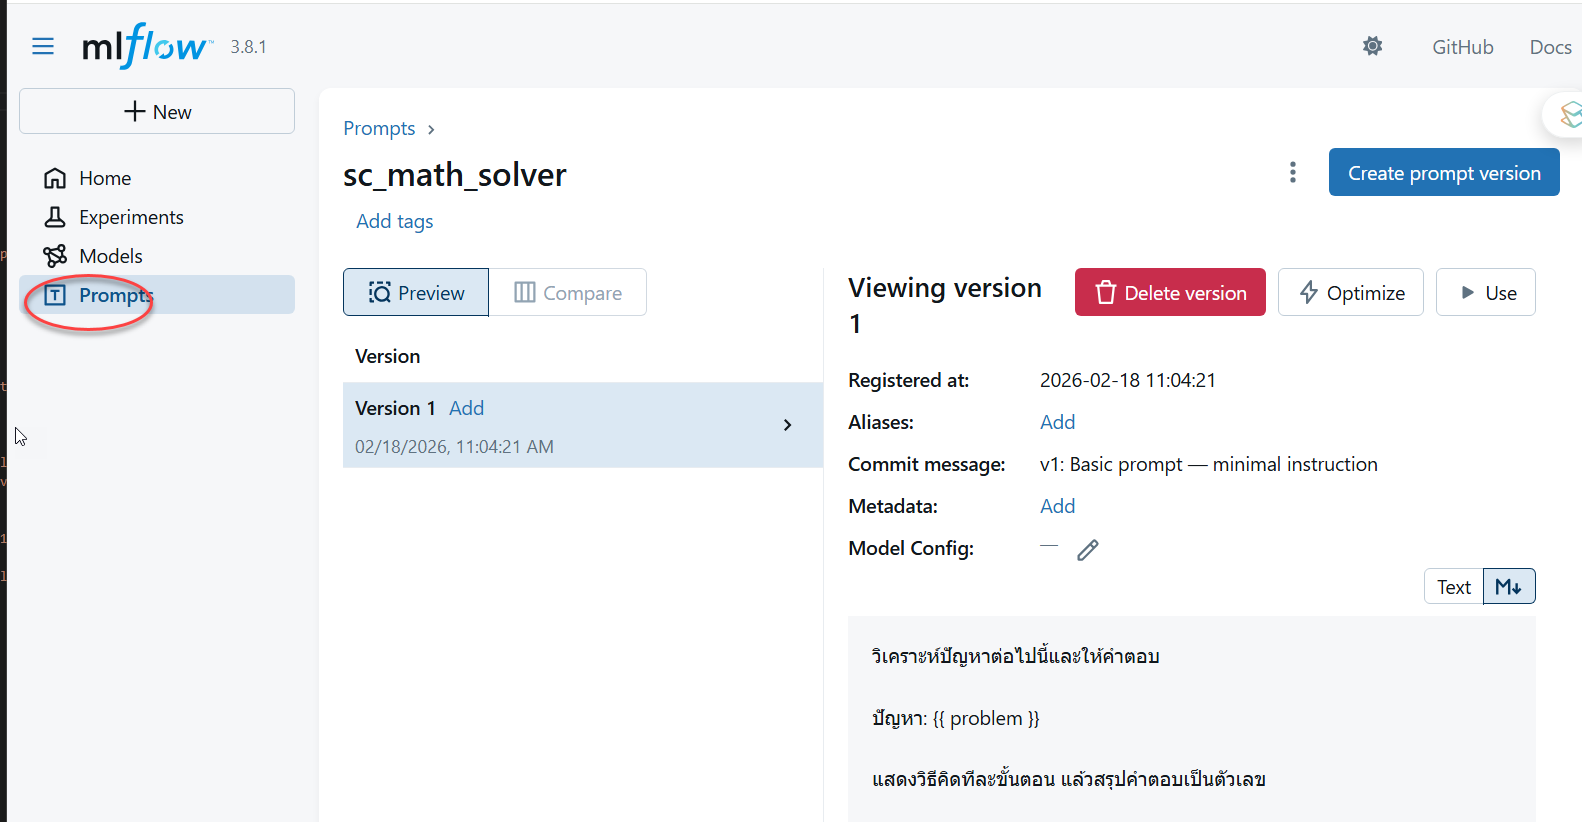

In [7]:
# ─────────────────────────────────────────────────────────
#  ลงทะเบียน Self-Consistency Prompt v1 ใน MLflow
# ─────────────────────────────────────────────────────────

print_title("เทคนิคที่ 1: Self-Consistency")

SC_PROMPT_NAME = "sc_math_solver"

# Prompt Version 1: ง่าย ตรงไปตรงมา
SC_PROMPT_V1 = """วิเคราะห์ปัญหาต่อไปนี้และให้คำตอบ

ปัญหา: {{ problem }}

แสดงวิธีคิดทีละขั้นตอน แล้วสรุปคำตอบเป็นตัวเลข"""

# ลงทะเบียนใน MLflow Prompt Registry
sc_prompt_v1 = mlflow.genai.register_prompt(
    name=SC_PROMPT_NAME,
    template=SC_PROMPT_V1,
    commit_message="v1: Basic prompt — minimal instruction",
)

track_version(SC_PROMPT_NAME, sc_prompt_v1.version)

print(f"  ✅ ลงทะเบียนสำเร็จ: '{SC_PROMPT_NAME}' version {sc_prompt_v1.version}")
print_box(
    title   = f"SC Prompt v{sc_prompt_v1.version}",
    content = SC_PROMPT_V1,
    emoji   = "📝",
)

2026/02/18 04:10:56 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for prompt version to finish creation. Prompt name: sc_math_solver, version 4



━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  🔷 เทคนิคที่ 1: Self-Consistency
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  ✅ ลงทะเบียนสำเร็จ: 'sc_math_solver' version 4

  ┌────────────────────────────────────────────────────────────────────────────┐
  │ 📝 SC Prompt v4                                                            │
  ├────────────────────────────────────────────────────────────────────────────┤
  │                                                                            │
  │ วิเคราะห์ปัญหาต่อไปนี้และให้คำตอบ                                          │
  │                                                                            │
  │ ปัญหา: {{ problem }}                                                       │
  │                                                                            │
  │ แสดงวิธีคิดทีละขั้นตอน แล้วสรุปคำตอบเป็นตัวเลข                             │
  │                                                           

In [8]:
# ─────────────────────────────────────────────────────────
#  Self-Consistency Engine: ส่วนสำคัญของเทคนิค
# ─────────────────────────────────────────────────────────

def extract_number_from_text(text: str) -> str:
    """
    สกัดตัวเลขสุดท้ายจาก text
    เหตุผล: AI มักสรุปคำตอบไว้ตอนท้าย เช่น "ดังนั้น คำตอบคือ 42"

    ตัวอย่าง:
        "...ดังนั้น คำตอบคือ 1,575 บาท" → "1575"
        "แต่ละคนได้ 4 ลูก"               → "4"
    """
    # หาตัวเลขทั้งหมด (รวม comma และ decimal)
    all_numbers = re.findall(r"\b\d[\d,]*(?:\.\d+)?\b", text)

    if not all_numbers:
        return "N/A"

    # เอาตัวเลขสุดท้าย (มักเป็นคำตอบสุดท้าย) และลบ comma ออก
    last_number = all_numbers[-1].replace(",", "")
    return last_number


def run_self_consistency(template: str,
                         problem: str,
                         n_samples: int = 5,
                         temperature: float = 0.7,
                         show_details: bool = True) -> Dict:
    """
    รัน Self-Consistency: สุ่มคำตอบ N ครั้ง → Majority Vote

    Parameters:
        template     : Prompt template (มี {{ problem }})
        problem      : โจทย์ที่ต้องการคำตอบ
        n_samples    : จำนวนครั้งที่ถาม (มากขึ้น = แม่นยำขึ้น แต่ช้าลง)
        temperature  : ความหลากหลายของคำตอบ (สูง = หลากหลาย)
        show_details : True = แสดงทุก Path (debug mode)
                       False = แสดงแค่สรุป (fast mode)

    Returns:
        dict: {
            "final_answer" : คำตอบที่ชนะการโหวต
            "confidence"   : สัดส่วน (เช่น 0.6 = 3/5)
            "answers"      : list คำตอบทุก path
            "distribution" : การกระจายของคำตอบ
        }
    """
    # แทน placeholder ด้วยโจทย์จริง
    filled_prompt = template.replace("{{ problem }}", problem)

    answers_collected = []
    full_responses = []

    print_title(f"รัน {n_samples} Reasoning Paths (temperature={temperature})", 2)

    # ── รัน N paths ──
    for path_num in range(1, n_samples + 1):

        # เรียก AI
        response = call_gemini(filled_prompt, temperature=temperature)
        full_responses.append(response)

        # สกัดคำตอบตัวเลข
        extracted_ans = extract_number_from_text(response)
        answers_collected.append(extracted_ans)

        if show_details:
            # แสดงผล path เต็มๆ ใน box
            print_box(
                title   = f"Path {path_num}/{n_samples}  →  คำตอบ: {extracted_ans}",
                content = response,
                emoji   = "🧠",
            )
        else:
            # แสดงสรุปสั้น (1 บรรทัด)
            preview = response.replace("\n", " ")[:65]
            status  = "✅" if extracted_ans != "N/A" else "⚠️"
            print(f"      {status} Path {path_num}: ans={extracted_ans:>10s}  │  {preview}...")

        time.sleep(1.0)  # หน่วงเวลาเล็กน้อย ป้องกัน rate limit

    # ── Majority Voting ──
    # นับเฉพาะคำตอบที่สกัดได้ (ไม่นับ "N/A")
    vote_counter = Counter(a for a in answers_collected if a != "N/A")

    if vote_counter:
        winner_ans, winner_count = vote_counter.most_common(1)[0]
        confidence = winner_count / n_samples
    else:
        winner_ans, confidence = "N/A", 0.0

    # ── แสดงผล Vote ──
    vote_lines = []
    for ans, count in vote_counter.most_common():
        filled_bar = "█" * (count * 6)
        empty_bar  = "░" * ((n_samples - count) * 6)
        is_winner  = "  ← Winner ✅" if ans == winner_ans else ""
        vote_lines.append(f"  {ans:>12s} :  {filled_bar}{empty_bar}  ({count}/{n_samples}){is_winner}")

    vote_lines.append(f"\n  🏆 Final Answer : {winner_ans}")
    vote_lines.append(f"  📊 Confidence   : {confidence:.0%}  ({int(confidence * n_samples)}/{n_samples} เห็นด้วย)")

    print_box(
        title   = "ผลการโหวต (Majority Vote)",
        content = "\n".join(vote_lines),
        emoji   = "🗳️",
    )

    return {
        "final_answer" : winner_ans,
        "confidence"   : confidence,
        "answers"      : answers_collected,
        "distribution" : dict(vote_counter),
        "all_responses": full_responses,
    }

In [9]:
# ─────────────────────────────────────────────────────────
#  ทดสอบ Self-Consistency
# ─────────────────────────────────────────────────────────

# โจทย์ง่าย: ทดสอบว่า SC ทำงานได้
EASY_PROBLEM = "มีแอปเปิ้ล 24 ลูก แบ่งให้เด็ก 6 คนเท่าๆ กัน แต่ละคนได้กี่ลูก?"

# โจทย์ยาก: หลายขั้นตอน มีหน่วยซับซ้อน
HARD_PROBLEM = """บริษัทมีพนักงาน 3 แผนก:
- แผนก A: 15 คน เงินเดือนเฉลี่ย 35,000 บาท
- แผนก B: 20 คน เงินเดือนเฉลี่ย 42,000 บาท
- แผนก C: 10 คน เงินเดือนเฉลี่ย 58,000 บาท

บริษัทจะขึ้นเงินเดือนทุกคน 8%
ค่าใช้จ่ายเงินเดือนรวมต่อเดือนหลังขึ้นเงินเดือนเป็นเท่าไหร่?"""



In [10]:
# ── ทดสอบโจทย์ง่าย ──
print_title("ทดสอบ: โจทย์ง่าย (หาร)")
print_box("โจทย์", EASY_PROBLEM, "❓")
sc_easy_result = run_self_consistency(SC_PROMPT_V1, EASY_PROBLEM, n_samples=3)




━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  🔷 ทดสอบ: โจทย์ง่าย (หาร)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

  ┌────────────────────────────────────────────────────────────────────────────┐
  │ ❓ โจทย์                                                                   │
  ├────────────────────────────────────────────────────────────────────────────┤
  │                                                                            │
  │ มีแอปเปิ้ล 24 ลูก แบ่งให้เด็ก 6 คนเท่าๆ กัน แต่ละคนได้กี่ลูก?              │
  │                                                                            │
  └────────────────────────────────────────────────────────────────────────────┘

  ── รัน 3 Reasoning Paths (temperature=0.7) ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [11]:
# ── ทดสอบโจทย์ยาก ──
print_title("ทดสอบ: โจทย์ยาก (คำนวณเงินเดือน)")
print_box("โจทย์", HARD_PROBLEM, "❓")
sc_hard_result = run_self_consistency(SC_PROMPT_V1, HARD_PROBLEM, n_samples=5)


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  🔷 ทดสอบ: โจทย์ยาก (คำนวณเงินเดือน)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

  ┌────────────────────────────────────────────────────────────────────────────┐
  │ ❓ โจทย์                                                                   │
  ├────────────────────────────────────────────────────────────────────────────┤
  │                                                                            │
  │ บริษัทมีพนักงาน 3 แผนก:                                                    │
  │ - แผนก A: 15 คน เงินเดือนเฉลี่ย 35,000 บาท                                 │
  │ - แผนก B: 20 คน เงินเดือนเฉลี่ย 42,000 บาท                                 │
  │ - แผนก C: 10 คน เงินเดือนเฉลี่ย 58,000 บาท                                 │
  │                                                                            │
  │ บริษัทจะขึ้นเงินเดือนทุกคน 8%                                              │
  │ ค่าใช้จ่ายเงินเดือนรวม

---
## 📘 เทคนิคที่ 2: Prompt Chaining

### หลักการ

แทนที่จะเขียน Prompt ยาวๆ ครั้งเดียว → **แบ่งงานออกเป็นขั้นตอนย่อย**
โดย output ของแต่ละขั้น จะเป็น input ของขั้นถัดไป

### ทำไมถึงได้ผล?

- AI ทำงานได้ดีขึ้นเมื่อ focus ทีละอย่าง
- Debug ง่าย: รู้ว่าขั้นไหนผิด
- แต่ละขั้นสามารถ optimize แยกกันได้
- ใช้ output จากขั้นก่อนเป็น context

### แผนผัง Lab นี้ (วิเคราะห์ Review)

```
 Review ──→ [Step 1: Extract]  ──→ JSON ข้อมูลดิบ
                                        │
                                        ▼
            [Step 2: Analyze] ──→ Score + Business Insight
                                        │
                                        ▼
            [Step 3: Report]  ──→ Executive Summary
```

### เหมาะกับงานประเภทไหน?

| ✅ เหมาะ | ❌ ไม่เหมาะ |
|---------|-----------|
| งานที่แบ่งขั้นได้ชัด | งานง่ายๆ 1 ขั้น |
| ต้องการ intermediate results | ต้องการ speed สูง |
| งาน document processing | ต้นทุน API ต่ำ |

In [12]:
# ─────────────────────────────────────────────────────────
#  ลงทะเบียน Prompt Chain 3 ขั้นตอน ใน MLflow
# ─────────────────────────────────────────────────────────

print_title("เทคนิคที่ 2: Prompt Chaining")

# ── กำหนด Template แต่ละขั้น ──

CHAIN_PROMPTS = {

    # ขั้นที่ 1: สกัดข้อมูลสำคัญจาก Review
    "chain_extract": {
        "template": """คุณเป็นผู้เชี่ยวชาญด้านการสกัดข้อมูลจาก Review

รีวิว:
{{ review }}

งาน: สกัดข้อมูลสำคัญออกมาให้ครบถ้วน ตอบเป็น JSON เท่านั้น

{
  "positive_points"  : ["จุดดีที่ลูกค้ากล่าวถึง"],
  "negative_points"  : ["จุดด้อยที่ลูกค้ากล่าวถึง"],
  "overall_emotion"  : "positive / negative / mixed",
  "has_sarcasm"      : "yes / no — อธิบายสั้นๆ ว่าเจอตรงไหน",
  "would_recommend"  : "yes / no / neutral"
}""",
        "commit_message": "v1: สกัดข้อมูลพื้นฐานจาก Review",
    },

    # ขั้นที่ 2: วิเคราะห์ Sentiment และ Business Impact
    "chain_analyze": {
        "template": """คุณเป็นนักวิเคราะห์ Sentiment และ Business Intelligence

ข้อมูลที่สกัดจาก Review:
{{ extracted }}

งาน: วิเคราะห์เชิงลึก ตอบเป็น JSON เท่านั้น

{
  "sentiment_score"   : "0-10 (0=แย่มาก, 10=ดีมาก)",
  "urgent_fixes"      : ["สิ่งที่ต้องแก้เร่งด่วน เรียงตามความสำคัญ"],
  "business_opportunities" : ["โอกาสทางธุรกิจที่เห็นได้"],
  "business_risks"    : ["ความเสี่ยงถ้าไม่แก้ไข"]
}""",
        "commit_message": "v1: วิเคราะห์ Sentiment + Business Impact",
    },

    # ขั้นที่ 3: สรุปรายงานสำหรับผู้บริหาร
    "chain_report": {
        "template": """คุณเป็น Business Report Writer ผู้เชี่ยวชาญ

ข้อมูลดิบจาก Review:
{{ extracted }}

ผลการวิเคราะห์:
{{ analysis }}

งาน: เขียน Executive Summary กระชับ ชัดเจน ใช้ตัดสินใจได้ทันที

รูปแบบ:
**HEADLINE:** [สรุปสถานการณ์ใน 1 ประโยค]

**KEY FINDINGS:**
• [ข้อค้นพบสำคัญที่ 1]
• [ข้อค้นพบสำคัญที่ 2]
• [ข้อค้นพบสำคัญที่ 3]

**PRIORITY ACTIONS:**
1. [สิ่งที่ต้องทำทันที]
2. [สิ่งที่ต้องทำภายใน 1 สัปดาห์]
3. [สิ่งที่ต้องทำภายใน 1 เดือน]

**RISK LEVEL:** LOW / MEDIUM / HIGH
**REASON:** [เหตุผล 1-2 ประโยค]""",
        "commit_message": "v1: สร้าง Executive Summary Report",
    },
}

# ── ลงทะเบียนทุก Prompt ใน MLflow ──
registered_chain_prompts = {}

for prompt_name, prompt_info in CHAIN_PROMPTS.items():
    registered = mlflow.genai.register_prompt(
        name=prompt_name,
        template=prompt_info["template"],
        commit_message=prompt_info["commit_message"],
    )
    registered_chain_prompts[prompt_name] = registered
    track_version(prompt_name, registered.version)

    print(f"  ✅ ลงทะเบียน: '{prompt_name}' version {registered.version}")

print_divider()
print(f"  📦 ลงทะเบียน Prompt Chain ทั้งหมด {len(CHAIN_PROMPTS)} ขั้นตอน")

2026/02/18 04:11:24 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for prompt version to finish creation. Prompt name: chain_extract, version 2
2026/02/18 04:11:24 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for prompt version to finish creation. Prompt name: chain_analyze, version 2
2026/02/18 04:11:24 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for prompt version to finish creation. Prompt name: chain_report, version 2



━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  🔷 เทคนิคที่ 2: Prompt Chaining
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  ✅ ลงทะเบียน: 'chain_extract' version 2
  ✅ ลงทะเบียน: 'chain_analyze' version 2
  ✅ ลงทะเบียน: 'chain_report' version 2
  ────────────────────────────────────────────────────────────
  📦 ลงทะเบียน Prompt Chain ทั้งหมด 3 ขั้นตอน


In [13]:
# ─────────────────────────────────────────────────────────
#  Chain Runner: รัน 3 ขั้นตอนต่อเนื่องกัน
# ─────────────────────────────────────────────────────────

def run_prompt_chain(review_text: str) -> Dict:
    """
    รัน Prompt Chain 3 ขั้น: Extract → Analyze → Report

    Output ของแต่ละขั้นจะถูกส่งต่อเป็น Input ของขั้นถัดไป

    Parameters:
        review_text : รีวิวที่ต้องการวิเคราะห์

    Returns:
        dict: ผลลัพธ์จากทุกขั้น {
            "chain_extract": "...",
            "chain_analyze": "...",
            "chain_report" : "...",
        }
    """
    step_results = {}

    step_configs = [
        {
            "name"  : "chain_extract",
            "emoji" : "🔍",
            "label" : "สกัดข้อมูล (Extract)",
            "build_prompt": lambda p, _: p.format(review=review_text),
        },
        {
            "name"  : "chain_analyze",
            "emoji" : "📊",
            "label" : "วิเคราะห์ Sentiment (Analyze)",
            "build_prompt": lambda p, r: p.format(extracted=r.get("chain_extract", "")),
        },
        {
            "name"  : "chain_report",
            "emoji" : "📋",
            "label" : "สรุปรายงาน (Report)",
            "build_prompt": lambda p, r: p.format(
                extracted = r.get("chain_extract", ""),
                analysis  = r.get("chain_analyze", ""),
            ),
        },
    ]

    print_title(f"รัน Prompt Chain ({len(step_configs)} ขั้นตอน)", 2)

    for step_num, step in enumerate(step_configs, start=1):
        # โหลด prompt เวอร์ชันล่าสุด
        prompt = load_latest_prompt(step["name"])

        # สร้าง prompt จริงโดยแทนค่า
        filled = step["build_prompt"](prompt, step_results)

        # เรียก AI และจับเวลา
        start_time = time.time()
        result     = call_gemini(filled)
        elapsed    = time.time() - start_time

        step_results[step["name"]] = result

        # แสดงผลแต่ละขั้น
        print_box(
            title   = f"ขั้นที่ {step_num}: {step['label']}  ⏱️ {elapsed:.1f}s",
            content = result,
            emoji   = step["emoji"],
        )

        time.sleep(1.0)

    print(f"\n  ✅ Chain สำเร็จ! ผ่านทั้ง {len(step_configs)} ขั้นตอน")
    return step_results

In [14]:
# ─────────────────────────────────────────────────────────
#  ทดสอบ Prompt Chain ด้วย Review แบบ Sarcastic (ประชดประชัน)
# ─────────────────────────────────────────────────────────

# Review ที่มีการประชดประชัน ทดสอบว่า Chain สามารถจับได้ไหม
SARCASTIC_REVIEW = """
ว้าว! ประทับใจมากจริงๆ ครับ สั่งไปเมื่อ 3 อาทิตย์ที่แล้ว เพิ่งได้รับวันนี้เอง
ช้าแค่นี้เองนะ ระดับ World Class มากๆ

ตัวสินค้าก็ดีครับ ถ้าไม่นับว่ามันแตกมาครึ่งหนึ่ง ก็ถือว่าโอเคนะ
จ่ายไป 2,500 บาท ได้ของที่ใช้ได้แค่ 3 วัน คุ้มมากๆ

Customer Service ตอบเร็วมากภายใน 5 วันทำการ ประทับใจในความรวดเร็ว

โดยรวมถ้าชอบความตื่นเต้นว่าของจะมาถึงมือหรือเปล่า แนะนำเลยครับ
"""

print_box(
    title   = "Review ทดสอบ (แบบประชดประชัน)",
    content = SARCASTIC_REVIEW,
    emoji   = "💬",
)

chain_results = run_prompt_chain(SARCASTIC_REVIEW)


  ┌────────────────────────────────────────────────────────────────────────────┐
  │ 💬 Review ทดสอบ (แบบประชดประชัน)                                           │
  ├────────────────────────────────────────────────────────────────────────────┤
  │                                                                            │
  │                                                                            │
  │ ว้าว! ประทับใจมากจริงๆ ครับ สั่งไปเมื่อ 3 อาทิตย์ที่แล้ว                   │
  │ เพิ่งได้รับวันนี้เอง                                                       │
  │ ช้าแค่นี้เองนะ ระดับ World Class มากๆ                                      │
  │                                                                            │
  │ ตัวสินค้าก็ดีครับ ถ้าไม่นับว่ามันแตกมาครึ่งหนึ่ง ก็ถือว่าโอเคนะ            │
  │ จ่ายไป 2,500 บาท ได้ของที่ใช้ได้แค่ 3 วัน คุ้มมากๆ                         │
  │                                                                            │
  │ Customer Service ตอบเร็ว

---
## 📘 เทคนิคที่ 3: Self-Critique

### หลักการ

ให้ AI **ตรวจและวิพากษ์คำตอบตัวเอง** แล้วนำผลวิพากษ์มาปรับปรุง

เปรียบเหมือนนักเขียนที่เขียนร่างแรก → แก้ไขเอง → ร่างสุดท้ายดีขึ้น

### แผนผัง

```
 คำถาม ──→ [Generate]  ──→  คำตอบ Draft
                                   │
                                   ▼
            [Critique]  ──→  จุดอ่อน / ข้อผิดพลาด
                                   │
                                   ▼
            [Revise]    ──→  คำตอบ Final (ดีขึ้น)
                                   │
                           (ทำซ้ำได้ N รอบ)
```

### ข้อดี vs ข้อเสีย

| ✅ ข้อดี | ⚠️ ข้อเสีย |
|---------|----------|
| ลด bias และ logical fallacy | ใช้ token มากกว่า 3x |
| ได้คำตอบรอบด้านขึ้น | ช้ากว่า |
| เหมาะกับหัวข้อ controversial | อาจ over-critique |

In [15]:
# ─────────────────────────────────────────────────────────
#  ลงทะเบียน Self-Critique Prompts ใน MLflow
# ─────────────────────────────────────────────────────────

print_title("เทคนิคที่ 3: Self-Critique")

CRITIQUE_PROMPTS = {

    # ขั้นที่ 1: สร้างคำตอบเบื้องต้น
    "crit_generate": {
        "template": """คุณเป็นผู้เชี่ยวชาญที่ให้คำแนะนำอย่างรอบคอบและสมดุล

คำถาม: {{ task }}

ตอบคำถามนี้อย่างครอบคลุม พิจารณาหลายมุมมอง
พร้อมให้เหตุผลชัดเจนสำหรับทุกข้อ""",
        "commit_message": "v1: Generate initial answer",
    },

    # ขั้นที่ 2: วิพากษ์คำตอบอย่างเข้มข้น
    "crit_critic": {
        "template": """คุณเป็น Devil's Advocate ผู้เชี่ยวชาญ — หน้าที่คือหาจุดอ่อนทุกอย่าง

โจทย์เดิม:
{{ task }}

คำตอบที่ต้องวิพากษ์:
{{ answer }}

ตรวจสอบอย่างเข้มข้นตามหัวข้อเหล่านี้:

□ Logical Fallacies  — มีการใช้ตรรกะที่ผิดพลาดไหม?
□ Unsupported Claims — มีการอ้างสิ่งที่ไม่มีหลักฐานสนับสนุนไหม?
□ Missing Perspectives — ขาดมุมมองสำคัญอะไรไปบ้าง?
□ Bias — มีความลำเอียงไหม? (เช่น เข้าข้างฝ่ายใดฝ่ายหนึ่ง)
□ Feasibility — สิ่งที่แนะนำทำได้จริงในทางปฏิบัติไหม?

⚠️ ข้อกำหนด: ต้องหาปัญหาอย่างน้อย 3 ข้อ ห้ามพูดว่าดีโดยไม่ชี้ข้อผิด

ตอบในรูปแบบ:
ISSUES:
- [ปัญหาที่ 1: อธิบายชัดเจน]
- [ปัญหาที่ 2: อธิบายชัดเจน]
- [ปัญหาที่ 3: อธิบายชัดเจน]

VERDICT: WEAK / ACCEPTABLE / STRONG
SUMMARY: [สรุป 2 ประโยค ว่าทำไมถึงให้ verdict นี้]""",
        "commit_message": "v1: Adversarial critic with structured output",
    },

    # ขั้นที่ 3: ปรับปรุงคำตอบโดยใช้ผลวิพากษ์
    "crit_revise": {
        "template": """คุณเป็นผู้เชี่ยวชาญที่รับผลวิพากษ์มาปรับปรุงคำตอบ

โจทย์เดิม:
{{ task }}

คำตอบเดิม:
{{ answer }}

ผลวิพากษ์จาก Critic:
{{ critique }}

งาน: ปรับปรุงคำตอบโดย:
1. แก้ไขทุกปัญหาที่ถูกชี้ใน ISSUES
2. เพิ่มมุมมองที่ขาดหายไป
3. รักษาจุดแข็งของคำตอบเดิม

ตอบในรูปแบบ:
WHAT_I_FIXED:
- [สิ่งที่แก้ไข 1]
- [สิ่งที่แก้ไข 2]

REVISED_ANSWER:
[คำตอบใหม่ที่ปรับปรุงแล้ว]

CONFIDENCE: LOW / MEDIUM / HIGH
REASON: [เหตุผล 1 ประโยค]""",
        "commit_message": "v1: Structured revision based on critique",
    },
}

# ── ลงทะเบียนทุก Prompt ──
for prompt_name, prompt_info in CRITIQUE_PROMPTS.items():
    registered = mlflow.genai.register_prompt(
        name=prompt_name,
        template=prompt_info["template"],
        commit_message=prompt_info["commit_message"],
    )
    track_version(prompt_name, registered.version)
    print(f"  ✅ ลงทะเบียน: '{prompt_name}' version {registered.version}")

2026/02/18 04:11:35 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for prompt version to finish creation. Prompt name: crit_generate, version 2
2026/02/18 04:11:35 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for prompt version to finish creation. Prompt name: crit_critic, version 2
2026/02/18 04:11:35 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for prompt version to finish creation. Prompt name: crit_revise, version 2



━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  🔷 เทคนิคที่ 3: Self-Critique
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  ✅ ลงทะเบียน: 'crit_generate' version 2
  ✅ ลงทะเบียน: 'crit_critic' version 2
  ✅ ลงทะเบียน: 'crit_revise' version 2


In [16]:
# ─────────────────────────────────────────────────────────
#  Self-Critique Runner
# ─────────────────────────────────────────────────────────

def run_self_critique(task: str, n_rounds: int = 1) -> Dict:
    """
    รัน Self-Critique Loop: Generate → Critique → Revise

    Parameters:
        task     : คำถาม / โจทย์ที่ต้องการคำตอบ
        n_rounds : จำนวนรอบที่วิพากษ์และแก้ไข (มากขึ้น = ดีขึ้น แต่ช้าลง)

    Returns:
        dict: {
            "initial_answer" : คำตอบแรกก่อน critique
            "final_answer"   : คำตอบสุดท้ายหลัง revise ทุกรอบ
            "rounds"         : ผลของแต่ละรอบ
        }
    """
    # โหลด prompts ล่าสุด
    generate_prompt = load_latest_prompt("crit_generate")
    critic_prompt   = load_latest_prompt("crit_critic")
    revise_prompt   = load_latest_prompt("crit_revise")

    print_title(f"Self-Critique ({n_rounds} รอบ)", 2)

    # ── ขั้นที่ 1: สร้างคำตอบแรก ──
    print("    📝 กำลังสร้างคำตอบเบื้องต้น...")
    initial_answer = call_gemini(
        generate_prompt.format(task=task),
        temperature=0.2,
    )
    print_box("ขั้นที่ 1: คำตอบเบื้องต้น (Draft)", initial_answer, "📝")
    time.sleep(1.0)

    current_answer = initial_answer
    all_rounds_data = []

    # ── รัน N รอบ Critique + Revise ──
    for round_num in range(1, n_rounds + 1):
        print_title(f"รอบที่ {round_num}/{n_rounds}", 2)

        # Critique: วิพากษ์คำตอบ
        print("    ⚔️  กำลังวิพากษ์คำตอบ...")
        critique = call_gemini(
            critic_prompt.format(task=task, answer=current_answer),
            temperature=0.1,  # temperature ต่ำ = วิพากษ์อย่างสม่ำเสมอ
        )
        print_box(f"ขั้นที่ 2: ผลวิพากษ์ (รอบ {round_num})", critique, "⚔️")
        time.sleep(1.0)

        # Revise: ปรับปรุงคำตอบ
        print("    ✏️  กำลังปรับปรุงคำตอบ...")
        revised = call_gemini(
            revise_prompt.format(task=task, answer=current_answer, critique=critique),
            temperature=0.2,
        )
        print_box(f"ขั้นที่ 3: คำตอบที่ปรับปรุงแล้ว (รอบ {round_num})", revised, "✨")
        time.sleep(1.0)

        # บันทึกผลรอบนี้
        verdict = next(
            (v for v in ["STRONG", "ACCEPTABLE", "WEAK"] if v in critique),
            "UNKNOWN",
        )
        all_rounds_data.append({
            "round"  : round_num,
            "critique": critique,
            "revised" : revised,
            "verdict" : verdict,
        })
        current_answer = revised  # ใช้คำตอบใหม่ในรอบถัดไป

    # สรุปผล
    print_title("สรุป Self-Critique", 2)
    for rd in all_rounds_data:
        verdict_emoji = {"STRONG": "💪", "ACCEPTABLE": "👍", "WEAK": "⚠️"}.get(rd["verdict"], "❓")
        print_metric(f"รอบ {rd['round']} Verdict", rd["verdict"], "", verdict_emoji)

    return {
        "initial_answer": initial_answer,
        "final_answer"  : current_answer,
        "rounds"        : all_rounds_data,
        "task"          : task,
    }

In [17]:
# ─────────────────────────────────────────────────────────
#  ทดสอบ Self-Critique ด้วยหัวข้อที่ต้องพิจารณาหลายมุม
# ─────────────────────────────────────────────────────────

COMPLEX_TASK = """
บริษัท Startup ด้าน FinTech (45 คน, กระจาย 3 จังหวัด) ควรใช้นโยบาย
Remote Work 100% หรือ มาออฟฟิศทุกวัน?

โปรดพิจารณาจาก 3 มุมมอง: นายจ้าง, ลูกจ้าง, และลูกค้า
"""

print_box("โจทย์ทดสอบ Self-Critique", COMPLEX_TASK, "❓")

critique_result = run_self_critique(COMPLEX_TASK, n_rounds=2)


  ┌────────────────────────────────────────────────────────────────────────────┐
  │ ❓ โจทย์ทดสอบ Self-Critique                                                │
  ├────────────────────────────────────────────────────────────────────────────┤
  │                                                                            │
  │                                                                            │
  │ บริษัท Startup ด้าน FinTech (45 คน, กระจาย 3 จังหวัด) ควรใช้นโยบาย         │
  │ Remote Work 100% หรือ มาออฟฟิศทุกวัน?                                      │
  │                                                                            │
  │ โปรดพิจารณาจาก 3 มุมมอง: นายจ้าง, ลูกจ้าง, และลูกค้า                       │
  │                                                                            │
  │                                                                            │
  └────────────────────────────────────────────────────────────────────────────┘

  ── Self-Critique (2 รอบ) 

---
## 🔁 Reflection Loop: ปรับปรุง Prompt อัตโนมัติ

### หลักการ

**Reflection** คือการให้ AI วิเคราะห์ว่าทำไม Prompt ถึงให้ผลลัพธ์ไม่ดี
แล้วสร้าง Prompt ใหม่ที่แก้ปัญหานั้น → วนซ้ำจนได้ accuracy ตามเป้า

### แผนผัง

```
 Prompt vN ──→ [ทดสอบกับ Dataset] ──→ Accuracy ≥ Target?
                                             │
                                       YES   │   NO
                                        ↓    │    ↓
                                       DONE  │  [Reflect]
                                             │    ↓
                                             │  วิเคราะห์ข้อที่ผิด
                                             │    ↓
                                             │  สร้าง Prompt vN+1
                                             │    ↓
                                             └──→ Loop
```

### Dataset ที่ใช้ทดสอบ

| ระดับ | จำนวน | ตัวอย่าง |
|-------|-------|---------|
| easy  | 2 ข้อ | หาร, คูณ ธรรมดา |
| medium| 2 ข้อ | หลายขั้นตอน, ส่วนลด |
| hard  | 2 ข้อ | ทำงานร่วม, ที่นั่ง |

In [18]:
# ─────────────────────────────────────────────────────────
#  Test Dataset: 6 โจทย์ 3 ระดับ
# ─────────────────────────────────────────────────────────

print_title("Reflection Loop: ปรับปรุง Prompt อัตโนมัติ")

TEST_DATASET = [
    # ── ระดับ Easy ──
    {
        "problem"   : "มีส้ม 24 ลูก แบ่งให้เด็ก 6 คนเท่าๆ กัน แต่ละคนได้กี่ลูก?",
        "expected"  : "4",
        "difficulty": "easy",
    },
    {
        "problem"   : "รถยนต์วิ่งด้วยความเร็ว 80 กม./ชม. นาน 3 ชั่วโมง วิ่งได้กี่กิโลเมตร?",
        "expected"  : "240",
        "difficulty": "easy",
    },

    # ── ระดับ Medium ──
    {
        "problem"   : "เสื้อ ราคา 350 บาท ซื้อ 3 ตัว และกางเกง ราคา 450 บาท ซื้อ 2 ตัว "
                      "ถ้าซื้อเกิน 1,500 บาท ได้ส่วนลด 15% จ่ายทั้งหมดเท่าไหร่?",
        "expected"  : "1785",
        "difficulty": "medium",
    },
    {
        "problem"   : "รถ 5 คัน วิ่งรวมกัน 450 กม./วัน อัตราสิ้นเปลือง 12 กม./ลิตร "
                      "น้ำมันราคา 42 บาท/ลิตร ค่าน้ำมันรวมทั้งหมดต่อวันเท่าไหร่?",
        "expected"  : "1575",
        "difficulty": "medium",
    },

    # ── ระดับ Hard ──
    {
        "problem"   : "ทีม A ทำงานได้ 1/30 ของงานต่อวัน ทีม B ทำได้ 1/45 ของงานต่อวัน "
                      "ถ้าทำงานพร้อมกัน ใช้กี่วันถึงเสร็จ? (ปัดขึ้นเป็นจำนวนเต็ม)",
        "expected"  : "18",
        "difficulty": "hard",
    },
    {
        "problem"   : "ร้านอาหารมี: โต๊ะเดี่ยว 8 โต๊ะ (2 คน/โต๊ะ), โต๊ะคู่ 5 โต๊ะ (4 คน/โต๊ะ), "
                      "โต๊ะใหญ่ 3 โต๊ะ (8 คน/โต๊ะ). ตอนนี้มีลูกค้า 35 คน และจะมาเพิ่มอีก "
                      "2 กลุ่ม กลุ่มละ 7 คน เหลือที่นั่งว่างกี่ที่?",
        "expected"  : "5",
        "difficulty": "hard",
    },
]

# แสดง Dataset ในตาราง
print_table(
    headers = ["#", "Difficulty", "Expected", "โจทย์ (ย่อ)"],
    rows    = [
        [
            str(i + 1),
            item["difficulty"],
            item["expected"],
            item["problem"][:45] + "...",
        ]
        for i, item in enumerate(TEST_DATASET)
    ],
    title = "Test Dataset (6 โจทย์)",
)


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  🔷 Reflection Loop: ปรับปรุง Prompt อัตโนมัติ
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

  📊 Test Dataset (6 โจทย์)
  ┌─────┬──────────────┬────────────┬─────────────────────────────────────────────────────┐
  │  #   │  Difficulty   │  Expected   │                    โจทย์ (ย่อ)                     │
  ├─────┼──────────────┼────────────┼─────────────────────────────────────────────────────┤
  │  1   │     easy      │     4       │  มีส้ม 24 ลูก แบ่งให้เด็ก 6 คนเท่าๆ กัน แต่ละค...  │
  │  2   │     easy      │    240      │  รถยนต์วิ่งด้วยความเร็ว 80 กม./ชม. นาน 3 ชั่วโ...  │
  │  3   │    medium     │    1785     │  เสื้อ ราคา 350 บาท ซื้อ 3 ตัว และกางเกง ราคา ...  │
  │  4   │    medium     │    1575     │  รถ 5 คัน วิ่งรวมกัน 450 กม./วัน อัตราสิ้นเปลื...  │
  │  5   │     hard      │     18      │  ทีม A ทำงานได้ 1/30 ของงานต่อวัน ทีม B ทำได้ ...  │
  │  6   │     hard      │     5       │  ร้านอาหา

In [19]:
# ─────────────────────────────────────────────────────────
#  Evaluate Function: ทดสอบ Prompt กับ Dataset
# ─────────────────────────────────────────────────────────

def evaluate_prompt(template: str,
                    dataset: List[Dict],
                    n_samples: int = 3,
                    label: str = "Prompt") -> Dict:
    """
    ทดสอบ SC Prompt กับ dataset ทั้งหมด และคืนค่า accuracy

    Parameters:
        template  : Prompt template ที่จะทดสอบ
        dataset   : list ของ {problem, expected, difficulty}
        n_samples : จำนวน SC paths ต่อโจทย์
        label     : ชื่อสำหรับแสดงผล

    Returns:
        dict: {
            "accuracy"  : overall accuracy (%)
            "results"   : ผลแต่ละข้อ
            "breakdown" : accuracy แยกตาม difficulty
        }
    """
    correct_count = 0
    all_results   = []

    print_title(f"ประเมิน: {label}", 2)

    for idx, item in enumerate(dataset, start=1):
        # รัน SC (verbose=False เพื่อแสดงผลสั้น)
        sc_result = run_self_consistency(
            template    = template,
            problem     = item["problem"],
            n_samples   = n_samples,
            temperature = 0.7,
            show_details = False,
        )

        # เปรียบเทียบคำตอบ
        predicted = sc_result["final_answer"].replace(",", "").strip()
        expected  = item["expected"].strip()
        is_correct = (predicted == expected)

        if is_correct:
            correct_count += 1

        all_results.append({
            "idx"        : idx,
            "problem"    : item["problem"][:45],
            "expected"   : expected,
            "predicted"  : predicted,
            "confidence" : sc_result["confidence"],
            "difficulty" : item["difficulty"],
            "correct"    : is_correct,
        })

        # แสดงผลแต่ละข้อ
        status = "✅" if is_correct else "❌"
        print(
            f"      {status} Q{idx} [{item['difficulty']:6s}]  "
            f"Expected={expected:>6s}  Got={predicted:>6s}  "
            f"Confidence={sc_result['confidence']:.0%}"
        )

    # ── คำนวณ Accuracy รวม ──
    overall_accuracy = (correct_count / len(dataset)) * 100

    # ── คำนวณ Accuracy แยกตาม Difficulty ──
    breakdown = {}
    for difficulty in ["easy", "medium", "hard"]:
        diff_results = [r for r in all_results if r["difficulty"] == difficulty]
        diff_correct = sum(1 for r in diff_results if r["correct"])
        diff_total   = len(diff_results)
        diff_acc     = (diff_correct / diff_total * 100) if diff_total > 0 else 0
        breakdown[difficulty] = {
            "correct" : diff_correct,
            "total"   : diff_total,
            "accuracy": diff_acc,
        }

    # ── แสดงผลสรุป ──
    print_table(
        headers = ["#", "Difficulty", "Expected", "Got", "Confidence", "Result"],
        rows    = [
            [
                str(r["idx"]),
                r["difficulty"],
                r["expected"],
                r["predicted"],
                f"{r['confidence']:.0%}",
                "✅" if r["correct"] else "❌",
            ]
            for r in all_results
        ],
        title = f"ผลการประเมิน — {label}",
    )

    # Summary box
    difficulty_emoji = {"easy": "🟢", "medium": "🟡", "hard": "🔴"}
    summary_lines = [f"Overall Accuracy: {overall_accuracy:.1f}%  ({correct_count}/{len(dataset)})\n"]
    for diff, info in breakdown.items():
        filled = int(info["accuracy"] / 10)
        bar    = "█" * filled + "░" * (10 - filled)
        summary_lines.append(
            f"{difficulty_emoji[diff]} {diff.capitalize():8s}:  {bar}  "
            f"{info['accuracy']:.0f}%  ({info['correct']}/{info['total']})"
        )

    print_box(
        title   = f"สรุป Accuracy — {label}",
        content = "\n".join(summary_lines),
        emoji   = "🎯",
    )

    return {
        "accuracy" : overall_accuracy,
        "results"  : all_results,
        "breakdown": breakdown,
    }

In [20]:
# ─────────────────────────────────────────────────────────
#  Reflect Function: วิเคราะห์ข้อผิดพลาด → สร้าง Prompt ใหม่
# ─────────────────────────────────────────────────────────

def reflect_and_improve_prompt(current_template: str,
                               eval_result: Dict) -> str:
    """
    วิเคราะห์ว่า Prompt ผิดพลาดตรงไหน และสร้าง Prompt ที่ดีขึ้น

    Parameters:
        current_template : Prompt เวอร์ชันปัจจุบัน
        eval_result      : ผลการ evaluate (จาก evaluate_prompt)

    Returns:
        str: Prompt template ใหม่ที่ควรดีขึ้น
             (ถ้าสกัดไม่ได้ จะคืน template เดิม)
    """
    wrong_items = [r for r in eval_result["results"] if not r["correct"]]

    if not wrong_items:
        print("  🎉 Accuracy 100% — ไม่จำเป็นต้องปรับปรุง!")
        return current_template

    # สร้าง Reflection Prompt
    wrong_summary = json.dumps(wrong_items[:4], ensure_ascii=False, indent=2)

    reflection_prompt = f"""คุณเป็น Prompt Engineer ผู้เชี่ยวชาญด้าน Math Reasoning

## Prompt ปัจจุบัน:
```
{current_template}
```

## ผลการทดสอบ:
- Overall Accuracy: {eval_result['accuracy']:.1f}%
- ข้อที่ผิด {len(wrong_items)} ข้อ

## รายละเอียดข้อที่ผิด:
{wrong_summary}

## งานของคุณ:
1. วิเคราะห์ pattern ว่าทำไม Prompt ปัจจุบันถึงให้คำตอบผิด
2. ระบุจุดอ่อน 2-3 จุดของ Prompt ปัจจุบัน
3. สร้าง Prompt ใหม่ที่แก้ไขจุดอ่อนเหล่านั้น

## กฎที่ต้องรักษา:
- ต้องมี {{{{ problem }}}} ใน prompt (สำหรับแทน placeholder)
- ให้ AI แสดง reasoning ก่อนสรุปคำตอบ
- กำหนด output format ชัดเจน
- คำตอบสุดท้ายต้องเป็นตัวเลข

## รูปแบบ output:
ขึ้นต้น Prompt ใหม่ด้วย [NEW_PROMPT_START]
จบด้วย [NEW_PROMPT_END]"""

    print_title("กำลัง Reflect...", 3)
    reflection_response = call_gemini(reflection_prompt, temperature=0.3, max_tokens=4096)

    print_box("ผล Reflection Analysis", reflection_response, "🔍")

    # สกัด Prompt ใหม่
    if "[NEW_PROMPT_START]" in reflection_response and "[NEW_PROMPT_END]" in reflection_response:
        start_idx  = reflection_response.index("[NEW_PROMPT_START]") + len("[NEW_PROMPT_START]")
        end_idx    = reflection_response.index("[NEW_PROMPT_END]")
        new_prompt = reflection_response[start_idx:end_idx].strip()

        print_box(
            title   = f"Prompt ใหม่ที่สร้างขึ้น ({len(new_prompt)} ตัวอักษร)",
            content = new_prompt,
            emoji   = "🆕",
        )
        return new_prompt

    print("    ⚠️  ไม่พบ Prompt ใหม่ใน response — ใช้ template เดิม")
    return current_template

In [21]:
# ─────────────────────────────────────────────────────────
#  Optimization Loop: วนทดสอบและปรับปรุงจนถึง Target
# ─────────────────────────────────────────────────────────

def run_optimization_loop(prompt_name: str,
                           initial_template: str,
                           dataset: List[Dict],
                           target_accuracy: float = 83.0,
                           max_iterations: int = 3,
                           n_samples: int = 3) -> Dict:
    """
    วน Loop: Evaluate → Reflect → Improve → Register → Repeat

    Parameters:
        prompt_name      : ชื่อ Prompt ใน MLflow Registry
        initial_template : Prompt เริ่มต้น
        dataset          : Dataset สำหรับทดสอบ
        target_accuracy  : เป้าหมาย accuracy (%)
        max_iterations   : รอบสูงสุด (ป้องกัน loop ไม่สิ้นสุด)
        n_samples        : SC paths ต่อโจทย์

    Returns:
        dict: สรุปผลทุก iteration
    """
    optimization_history = []
    current_template     = initial_template

    print_title(f"Optimization Loop — เป้าหมาย {target_accuracy}%", 2)
    print_divider("═")

    for iteration in range(1, max_iterations + 1):
        print(f"\n  🔄 Iteration {iteration}/{max_iterations}")
        print_divider()

        # ── ทดสอบ Prompt ปัจจุบัน ──
        eval_result = evaluate_prompt(
            template  = current_template,
            dataset   = dataset,
            n_samples = n_samples,
            label     = f"Iteration {iteration}",
        )

        # บันทึกประวัติ
        optimization_history.append({
            "iteration": iteration,
            "accuracy" : eval_result["accuracy"],
            "breakdown": eval_result["breakdown"],
        })

        # ── ตรวจสอบว่าถึง Target แล้วหรือยัง ──
        if eval_result["accuracy"] >= target_accuracy:
            print(f"\n  🎉 ถึงเป้าหมายแล้ว! {eval_result['accuracy']:.1f}% ≥ {target_accuracy}%")
            break

        print(f"\n  🔍 ยังไม่ถึงเป้า ({eval_result['accuracy']:.1f}% < {target_accuracy}%)")
        print(    "     กำลัง Reflect และสร้าง Prompt ใหม่...")

        # ── Reflect และสร้าง Prompt ใหม่ ──
        new_template = reflect_and_improve_prompt(current_template, eval_result)

        if new_template != current_template:
            # ลงทะเบียน Prompt ใหม่ใน MLflow
            new_registered = mlflow.genai.register_prompt(
                name=prompt_name,
                template=new_template,
                commit_message=(
                    f"Reflection iter {iteration}: "
                    f"accuracy {eval_result['accuracy']:.1f}% → improving"
                ),
            )
            track_version(prompt_name, new_registered.version)
            print(f"  📦 ลงทะเบียน version ใหม่: v{new_registered.version}")
            current_template = new_template
        else:
            print("  ⚠️  Prompt ไม่เปลี่ยนแปลง — หยุด Loop")
            break

        time.sleep(2.0)

    # ── แสดง History ──
    print_title("ประวัติการ Optimize", 2)
    print_table(
        headers = ["Iter", "Accuracy", "Easy", "Medium", "Hard"],
        rows    = [
            [
                str(h["iteration"]),
                f"{h['accuracy']:.1f}%",
                f"{h['breakdown']['easy']['accuracy']:.0f}%",
                f"{h['breakdown']['medium']['accuracy']:.0f}%",
                f"{h['breakdown']['hard']['accuracy']:.0f}%",
            ]
            for h in optimization_history
        ],
        title = "Accuracy แต่ละ Iteration",
    )

    # แสดงการปรับปรุงรวม
    if len(optimization_history) > 1:
        total_improvement = (
            optimization_history[-1]["accuracy"] - optimization_history[0]["accuracy"]
        )
        emoji = "📈" if total_improvement >= 0 else "📉"
        print_metric("การปรับปรุงรวม", total_improvement, "%", emoji)

    return {
        "history"          : optimization_history,
        "final_template"   : current_template,
        "final_accuracy"   : optimization_history[-1]["accuracy"],
        "total_iterations" : len(optimization_history),
    }

In [22]:
# ─────────────────────────────────────────────────────────
#  รัน Optimization Loop จริง!
# ─────────────────────────────────────────────────────────

print_title("เริ่ม Optimization Loop!")

loop_result = run_optimization_loop(
    prompt_name      = SC_PROMPT_NAME,
    initial_template = SC_PROMPT_V1,
    dataset          = TEST_DATASET,
    target_accuracy  = 83.0,    # เป้าหมาย: ตอบถูก 5/6 ข้อขึ้นไป
    max_iterations   = 3,       # ลองปรับปรุงสูงสุด 3 รอบ
    n_samples        = 3,       # SC 3 paths ต่อโจทย์ (ประหยัด cost)
)


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  🔷 เริ่ม Optimization Loop!
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

  ── Optimization Loop — เป้าหมาย 83.0% ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  ════════════════════════════════════════════════════════════

  🔄 Iteration 1/3
  ────────────────────────────────────────────────────────────

  ── ประเมิน: Iteration 1 ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

2026/02/18 04:13:41 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for prompt version to finish creation. Prompt name: sc_math_solver, version 5



  ┌────────────────────────────────────────────────────────────────────────────┐
  │ 🔍 ผล Reflection Analysis                                                  │
  ├────────────────────────────────────────────────────────────────────────────┤
  │                                                                            │
  │ [NEW_PROMPT_START]                                                         │
  │                                                                            │
  │ วิเคราะห์และแก้ปัญหาคณิตศาสตร์ต่อไปนี้อย่างละเอียด:                        │
  │                                                                            │
  │ {{ problem }}                                                              │
  │                                                                            │
  │ **วิธีคิด:**                                                               │
  │                                                                            │
  │ 1.  **ทำความเข้าใจปัญหา:

2026/02/18 04:15:31 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for prompt version to finish creation. Prompt name: sc_math_solver, version 6



  ┌────────────────────────────────────────────────────────────────────────────┐
  │ 🔍 ผล Reflection Analysis                                                  │
  ├────────────────────────────────────────────────────────────────────────────┤
  │                                                                            │
  │ [NEW_PROMPT_START]                                                         │
  │ วิเคราะห์และแก้ปัญหาคณิตศาสตร์ต่อไปนี้อย่างละเอียด:                        │
  │                                                                            │
  │ {{ problem }}                                                              │
  │                                                                            │
  │ **วิธีคิด:**                                                               │
  │                                                                            │
  │ 1.  **ทำความเข้าใจปัญหา:** อ่านโจทย์อย่างละเอียด ระบุสิ่งที่โจทย์ถาม       │
  │ และข้อมูลที่โจทย์ให้มา ห

2026/02/18 04:17:26 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for prompt version to finish creation. Prompt name: sc_math_solver, version 7



  ┌────────────────────────────────────────────────────────────────────────────┐
  │ 🔍 ผล Reflection Analysis                                                  │
  ├────────────────────────────────────────────────────────────────────────────┤
  │                                                                            │
  │ [NEW_PROMPT_START]                                                         │
  │                                                                            │
  │ มาวิเคราะห์และแก้ปัญหาคณิตศาสตร์ต่อไปนี้อย่างละเอียด                       │
  │ โดยเน้นการให้เหตุผลที่ชัดเจนและแม่นยำ:                                     │
  │                                                                            │
  │ {{ problem }}                                                              │
  │                                                                            │
  │ **วิธีคิด:**                                                               │
  │                         

---
## 📊 ส่วนสุดท้าย: บันทึกผลใน MLflow และสรุปรวม

MLflow ช่วยให้เราติดตามและเปรียบเทียบผลการทดลองทั้งหมดได้
รวมถึง Prompt versions, metrics, และ parameters ต่างๆ

In [23]:
# ─────────────────────────────────────────────────────────
#  บันทึกผลทุกอย่างใน MLflow
# ─────────────────────────────────────────────────────────

print_title("บันทึกผลใน MLflow")

with mlflow.start_run(run_name="prompt_engineering_lab_final"):

    # ── SC Optimization Metrics ──
    for hist in loop_result["history"]:
        mlflow.log_metric(
            key  = f"sc_accuracy_iter{hist['iteration']}",
            value= hist["accuracy"],
        )

    mlflow.log_metric("sc_final_accuracy",  loop_result["final_accuracy"])
    mlflow.log_metric("sc_total_iterations", loop_result["total_iterations"])

    # ── Prompt Chaining Metrics ──
    mlflow.log_metric("chain_n_steps",       3)
    mlflow.log_metric("chain_report_length", len(chain_results.get("chain_report", "")))

    # ── Self-Critique Metrics ──
    mlflow.log_metric("critique_n_rounds",    len(critique_result["rounds"]))
    mlflow.log_metric("critique_final_length", len(critique_result["final_answer"]))

    # ── Parameters ──
    mlflow.log_param("model_id",     MODEL_ID)
    mlflow.log_param("techniques",   "Self-Consistency, Prompt-Chaining, Self-Critique")
    mlflow.log_param("test_size",    len(TEST_DATASET))
    mlflow.log_param("sc_n_samples", 3)
    mlflow.log_param("target_acc",   83.0)

    print("  ✅ บันทึก Metrics สำเร็จ:")
    print(f"     - SC final accuracy: {loop_result['final_accuracy']:.1f}%")
    print(f"     - SC iterations    : {loop_result['total_iterations']}")
    print(f"     - Chain steps      : 3")
    print(f"     - Critique rounds  : {len(critique_result['rounds'])}")


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  🔷 บันทึกผลใน MLflow
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  ✅ บันทึก Metrics สำเร็จ:
     - SC final accuracy: 66.7%
     - SC iterations    : 3
     - Chain steps      : 3
     - Critique rounds  : 2
🏃 View run prompt_engineering_lab_final at: http://127.0.0.1:5000/#/experiments/1/runs/8f3f339dd252421389bae497e8dfc2d9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


In [24]:
# ─────────────────────────────────────────────────────────
#  🏆 Dashboard สรุปผลทั้งหมด
# ─────────────────────────────────────────────────────────

print_title("🏆 Lab Dashboard — สรุปผลทั้งหมด")

# ── ตาราง Technique Results ──
sarcasm_detected = (
    "sarcasm" in chain_results.get("chain_extract", "").lower()
    or "ประชด" in chain_results.get("chain_extract", "")
    or "yes" in chain_results.get("chain_extract", "").lower()
)

print_table(
    headers = ["เทคนิค", "สิ่งที่วัด", "ผลลัพธ์"],
    rows    = [
        [
            "Self-Consistency",
            "Final Accuracy",
            f"{loop_result['final_accuracy']:.1f}%",
        ],
        [
            "Prompt Chaining",
            "Sarcasm Detected",
            "✅ ใช่" if sarcasm_detected else "❓ ไม่แน่ใจ",
        ],
        [
            "Self-Critique",
            "จำนวนรอบ Revise",
            f"{len(critique_result['rounds'])} รอบ",
        ],
    ],
    title = "ผลลัพธ์แต่ละเทคนิค",
)

# ── SC Optimization Progress ──
print_title("SC Optimization Progress", 2)
for hist in loop_result["history"]:
    print_progress(
        current = int(hist["accuracy"]),
        total   = 100,
        label   = f"Iter {hist['iteration']}: {hist['accuracy']:.1f}%",
    )

# ── MLflow Registry Summary ──
print_title("MLflow Prompt Registry", 2)

all_prompt_names = [
    SC_PROMPT_NAME,
    "chain_extract",
    "chain_analyze",
    "chain_report",
    "crit_generate",
    "crit_critic",
    "crit_revise",
]

print_table(
    headers = ["Prompt Name", "Latest Version", "เทคนิค"],
    rows    = [
        [
            name,
            f"v{get_latest_version(name)}",
            "Self-Consistency" if "sc_" in name
            else "Prompt Chaining" if "chain_" in name
            else "Self-Critique",
        ]
        for name in all_prompt_names
    ],
    title = "Prompt Registry Summary",
)

# ── Links ──
print_divider("═")
print(f"\n  🌐 ดูผลใน MLflow UI : {MLFLOW_URI}")
print(f"  📊 Experiment       : prompt_engineering_lab")
print(f"  📦 Prompts          : {len(all_prompt_names)} prompts registered")
print_divider("═")


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  🔷 🏆 Lab Dashboard — สรุปผลทั้งหมด
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

  📊 ผลลัพธ์แต่ละเทคนิค
  ┌────────────────────┬────────────────────┬────────────┐
  │       เทคนิค        │     สิ่งที่วัด      │  ผลลัพธ์  │
  ├────────────────────┼────────────────────┼────────────┤
  │  Self-Consistency   │   Final Accuracy    │   66.7%   │
  │  Prompt Chaining    │  Sarcasm Detected   │   ✅ ใช่   │
  │   Self-Critique     │  จำนวนรอบ Revise    │   2 รอบ   │
  └────────────────────┴────────────────────┴────────────┘

  ── SC Optimization Progress ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

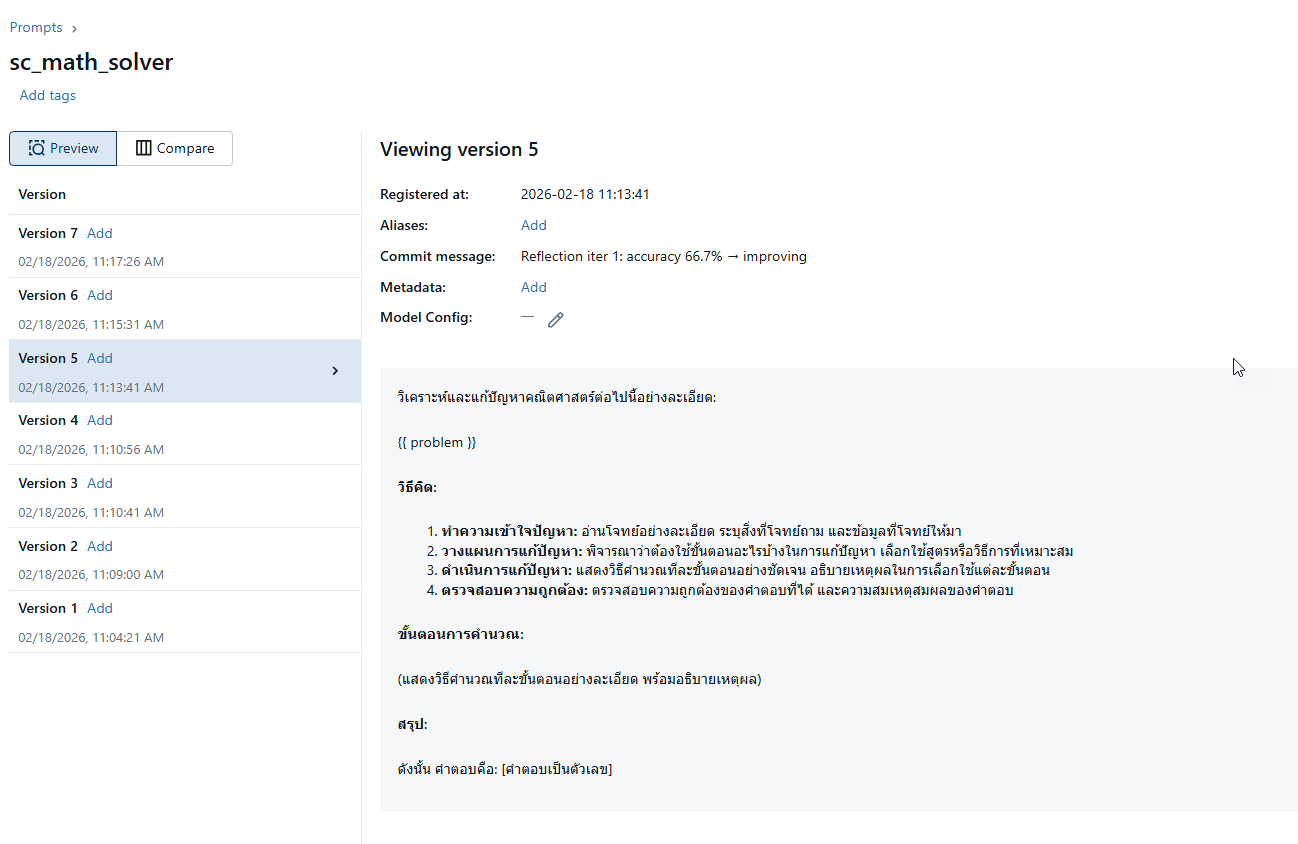

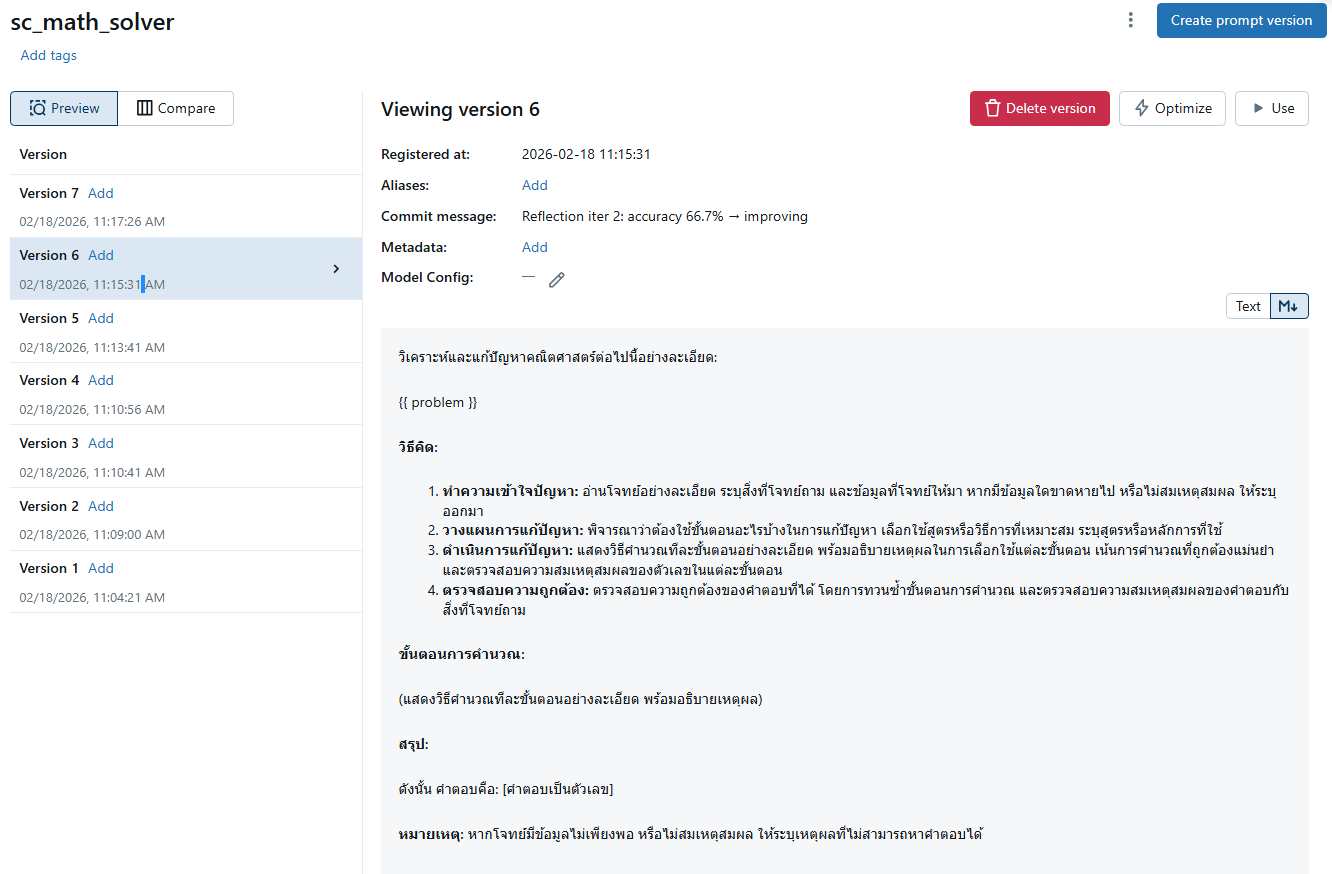

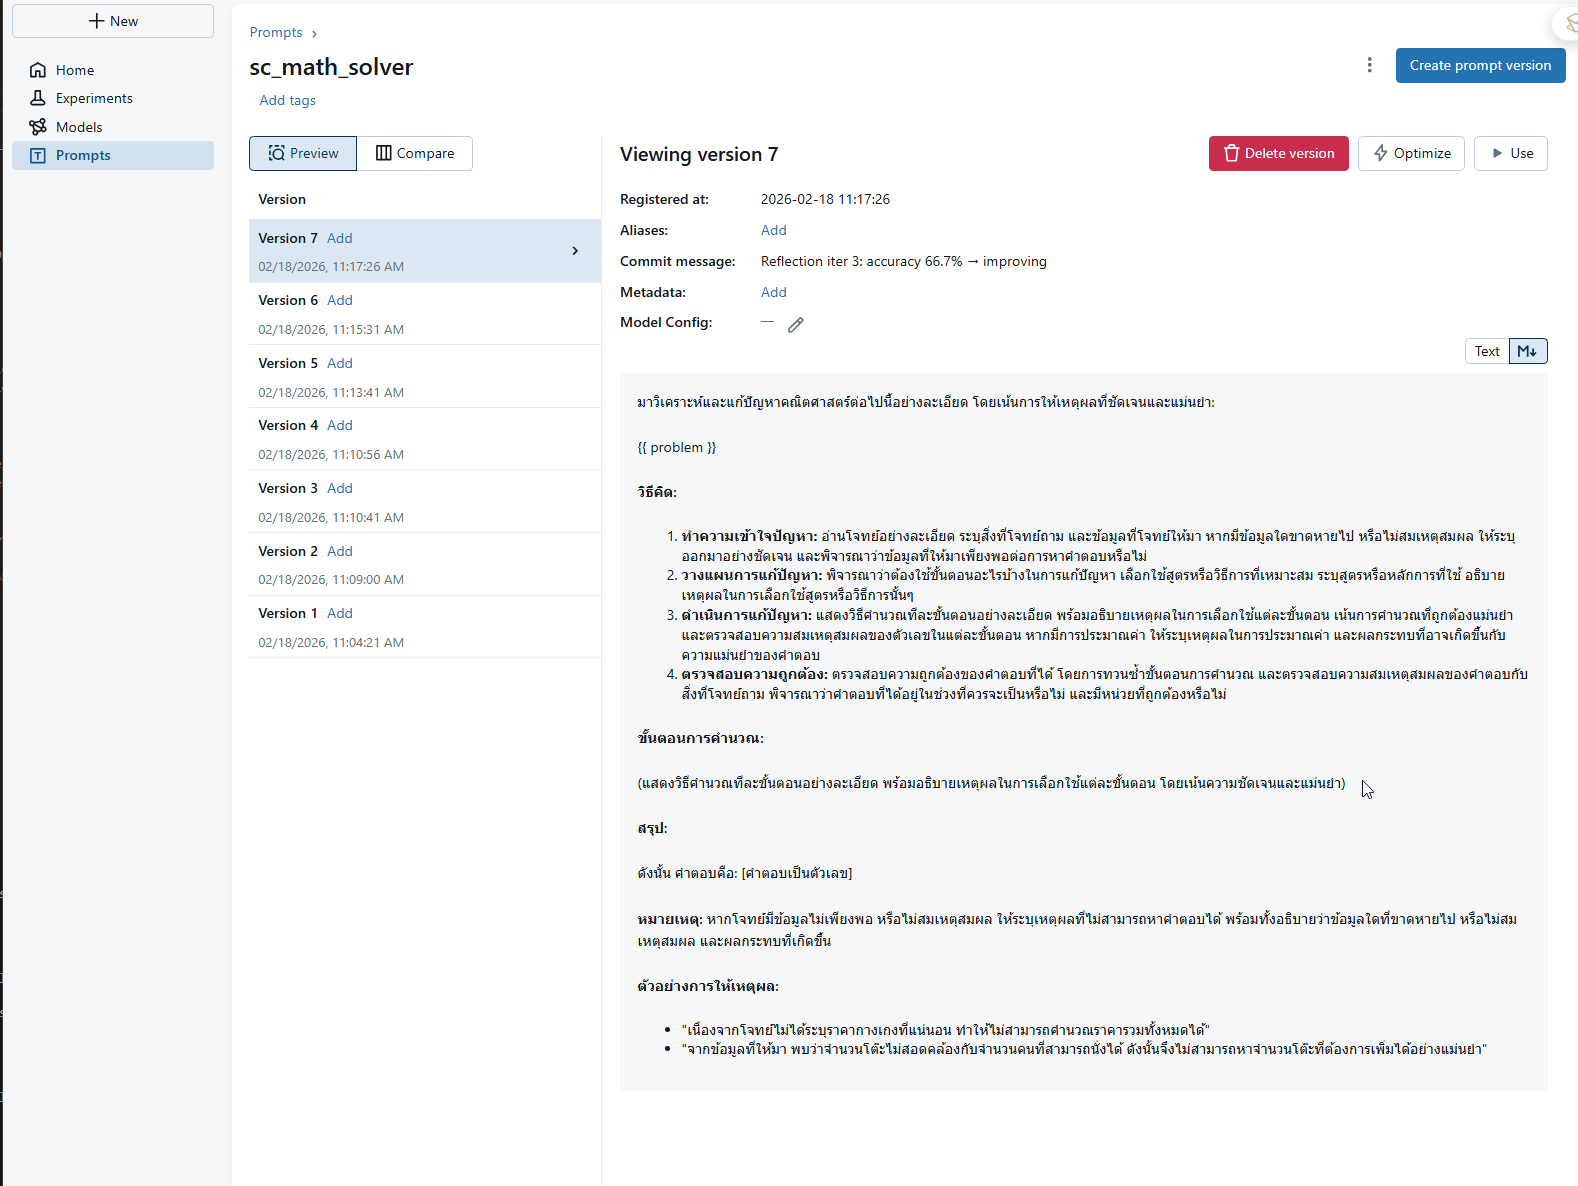

---
## 📝 สรุปบทเรียน (Key Takeaways)

### 3 เทคนิค Prompt Engineering

| เมื่อไหร่ควรใช้? | เทคนิค | เหตุผล |
|----------------|--------|--------|
| งาน Math / Logic / ต้องการความแม่นยำ | **Self-Consistency** | Majority vote ลดโอกาสผิด |
| งานซับซ้อนหลายขั้นตอน (เช่น วิเคราะห์ document) | **Prompt Chaining** | แยก focus, debug ง่าย |
| หัวข้อ controversial / ต้องการ unbiased answer | **Self-Critique** | วิพากษ์ตัวเอง → รอบด้านขึ้น |
| Prompt ยังให้ผลไม่ดีพอ | **Reflection Loop** | วิเคราะห์ข้อผิด → auto-improve |

### MLflow Best Practices

| ✅ ควรทำ | ❌ ไม่ควรทำ |
|---------|-----------|
| ใส่ `commit_message` ทุกครั้งที่ register | Register โดยไม่มี message |
| ติดตาม version ด้วย `track_version()` | ใช้ version hardcode |
| `log_metric` ทุกครั้งที่ evaluate | วัดผลแค่ในหัว |
| ตั้งชื่อ prompt ให้สื่อความหมาย | ตั้งชื่อ prompt1, prompt2 |

### แนวคิดที่สำคัญที่สุด

> **"Prompt Engineering ไม่ใช่ศิลปะ แต่เป็นวิทยาศาสตร์"**
>
> วัดผล → วิเคราะห์ → ปรับปรุง → วัดผลซ้ำ
> เหมือนการพัฒนา Software ที่ดี ต้องมี test และ iteration

---
**🎉 ยินดีด้วย! คุณเรียนจบ Lab นี้แล้ว**

สิ่งที่คุณทำได้แล้ว:
- ✅ เขียนและทดสอบ 3 เทคนิค Prompt Engineering
- ✅ ลงทะเบียนและจัดการ Prompt versions ใน MLflow
- ✅ สร้าง Reflection Loop เพื่อปรับปรุง Prompt อัตโนมัติ
- ✅ ติดตามและเปรียบเทียบผลด้วย MLflow Tracking
```